<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
from sympy import *
init_printing()

# Homework 9 #

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

### `Plot_continuous` ###
In this homework you will plot a number of densities using the `prob140` function `Plot_continuous` which takes as its arguments:

- a list consisting of two elements: the left endpoint and right endpoint of the plotting interval on the horizontal axis
- the name of a function that takes a numerical argument and returns the value of the density at that argument; this could be a function you have defined, or a `SciPy` function `stats.distribution_name.pdf`.

`Plot_continuous` takes other arguments as well, as you can see in the brief [documentation](http://prob140.org/prob140/_autosummary/prob140.plots.Plot_continuous.html#prob140.plots.Plot_continuous), but you will not need those in the homework. 

### 1. Transformations of the Normal ###
Let $Z$ have the standard normal density.

**a)** Find the density of $\vert Z \vert$. Don't try to use a formula. Just think about $P(\vert Z \vert \in dy)$ for positive $y$.

**b)** Find $E(\vert Z \vert)$. Calculating the integral is straightforward; you should just be able to recognize the indefinite integral.

**c) [CODE]** Complete the cell below to use `Plot_continuous` to plot the density of $\vert Z \vert$ and mark the expectation on the horizontal axis. In Data 8 you saw distributions of this shape when you simulated statistics such as "the absolute difference between the proportion of heads and 1/2".

Start by defining a function `abs_norm_density` that takes a number $y$ (positive or otherwise) as its argument and returns the density of $\vert Z \vert$ at $y$. Then plot the density over the interval $(-0.5, 4)$.

Assign $E(\vert Z \vert)$ to the name `ev`. Use `np.pi` for $\pi$.

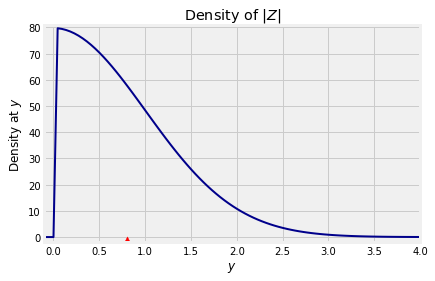

In [2]:
# answer to 1c

def abs_norm_density(y):
    if y > 0:
        return 2*stats.norm.pdf(y)
    else:
        return 0

Plot_continuous([-0.5, 4], abs_norm_density)

ev = 2/np.sqrt(2*np.pi)
plt.scatter(ev, -0.01, marker = '^', color='red', s=50)

# Labels and axes; do not edit below this line
plt.xlabel('$y$')
plt.ylabel('Density at $y$')
plt.title('Density of $|Z|$')
plt.xlim(-0.1, 4)
plt.ylim(-0.02, 0.81);
x = Symbol('x')

**d)** A random variable whose log is normal is said to have a lognormal density. In the previous homework you examined the special case where the log is standard normal. Now let $X$ have the normal $(\mu, \sigma^2)$ density and let $Y = e^X$. Use the change of variable formula for densities to find the density of $Y$.

**e) [CODE]** Complete the definitions in the cell below to get a plot of the lognormal density in the case $\mu = 0$ and $\sigma = 1$ and also (in gold) the lognormal density in the case $\mu = 0$, $\sigma = 0.5$. Use `np.log(w)` for $\log(w)$, and remember that `stats.norm.pdf(x, mu, sigma)` evaluates the normal density with mean $\mu$ and SD $\sigma$ at the point $x$. 

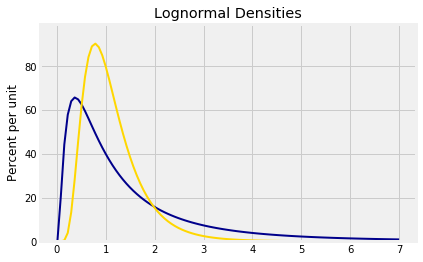

In [3]:
# answer to 1e

# Density of e^Z where Z is standard normal
def lognorm_density_1(y):
    return 1/y * stats.norm.pdf(np.log(y),0,1)


# Density of e^X where X is normal with mean 0 and SD 0.5
def lognorm_density_05(y):
    return 1/y * stats.norm.pdf(np.log(y),0,0.5)

Plot_continuous([0.01, 7], lognorm_density_1)
Plot_continuous([0.01, 7], lognorm_density_05, color='gold')
plt.title('Lognormal Densities');

#newpage

### 2. Cauchy Density ###
Part (a) is from Pitman's text, page 310, where you'll find a useful diagram. But note that we are using $\Theta$ where he uses $\Phi$, to avoid confusion with the standard normal cdf.

**a)** Suppose that a particle is fired from the origin in the $(x, y)$-plane in a straight line in a direction at a random angle $\Theta$ to the $x$-axis. Let $Y$ be the $y$-coordinate of the point where the particle hits the line $x = 1$. Show that if $\Theta$ has the uniform distribution on $(-\pi/2, \pi/2)$, then the density of $Y$ is

$$
f_Y(y) ~ = ~ \frac{1}{\pi(1 + y^2)}, ~~~ - \infty < y < \infty
$$

This is called the *Cauchy* density.

**b) [CODE]** Use `Plot_continuous` twice, to plot the Cauchy density over the interval $(-5, 5)$ and overlay the standard normal curve. Use `stats.cauchy.pdf` for the Cauchy density, make sure to use  `'gold'` for the color of the normal curve. Refer to the description of `Plot_continuous` at the top of this homework.

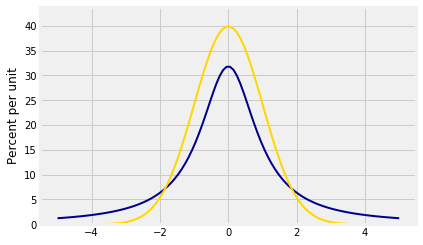

In [4]:
# answer to 2b

# Plotting interval on the horizontal axis: -5 to 5
# The first plot should be the Cauchy.
# The gold plot should be the standard normal curve.

def cauchy(x):
    return stats.cauchy.pdf(x)

Plot_continuous([-5,5], cauchy)
Plot_continuous([-5,5],stats.norm.pdf, color='gold')

**c)** For $Y$ with the Cauchy density, use calculus to show that $E(\lvert Y \rvert ) = \infty$. Thus $E(Y)$ is undefined even though the density of $Y$ is symmetric about 0.

The Cauchy curve is called the [Witch of Agnesi](https://en.wikipedia.org/wiki/Witch_of_Agnesi). Skim the History and Applications sections of the Wikipedia article.

**2d)** Explain what is being plotted by the code below, and discuss what you see in the graph in relation to the Weak Law of Large Numbers. Run the cell several times before you answer. You should also vary $N$.

[`stats.cauchy.rvs(size = N)` returns an array of $N$ i.i.d. Cauchy random numbers.]

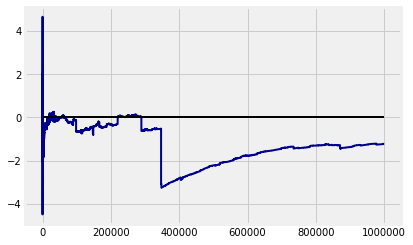

In [5]:
#2d: run this
N = 1000000
n = np.arange(1, N+1)
x = stats.cauchy.rvs(size = N)
y = np.cumsum(x)/n
plt.plot(n, y, color='darkblue', lw=2)
plt.plot([0, N], [0, 0], color='k', lw=2);

#newpage

### 3. Functions of Uniform Random Variables ###
Let $X$ and $Y$ have joint density

$$f(x, y) = 
\begin{cases}
90(y-x)^8, ~~~~ 0 < x < y < 1 \\
0 ~~~~~~~~~~~~~~~~~~~~~ \text{otherwise}
\end{cases}$$ 

In what follows, please do the calculus yourself. No `SymPy`.

**a)** Find $P(Y > 2X)$.

**b)** Find the marginal density of $X$.

**c)** Fill in the blanks (explain briefly):
The joint density $f$ above is the joint density of the $\underline{~~~~~~~~~~~~~~~~}$ and $\underline{~~~~~~~~~~~~~~~~}$ of ten independent uniform $(0, 1)$ random variables.


#newpage

### 4. The Gamma Densities ###
In this problem you will start with some calculus exercises and then develop one of the fundamental families of densities. Assume that $r > 0$ and $\lambda > 0$ are constants.

**a)** The *Gamma function* of mathematics is defined by
$$
\Gamma (r) ~ = ~ \int_0^\infty t^{r-1} e^{-t} dt
$$

That letter is the upper case Greek letter Gamma. You can assume that the integral converges and that therefore $\Gamma(r)$ is a positive number.

Use integration by parts to show that 
$$
\Gamma(r+1) ~ = ~ r\Gamma(r), ~~~ r > 0
$$

**b)** Use part (a) and induction to show that if $r$ is a positive integer then $\Gamma(r) = (r-1)!$. Thus the Gamma function is a continuous extension of the factorial function.

**c)** Let $X$ have density given by
$$
f_X(t) =
\begin{cases}
\frac{1}{\Gamma(r)} t^{r-1}e^{-t}, ~~~ t > 0 \\
0 ~~~~~~~~~~~~~~~~~~~~ \text{otherwise}
\end{cases}
$$

Let $Y = \frac{1}{\lambda} X$. Show that the density of $Y$ is

$$
f_Y(t) =
\begin{cases}
\frac{\lambda^r}{\Gamma(r)} t^{r-1}e^{-\lambda t}, ~~~ t > 0 \\
0 ~~~~~~~~~~~~~~~~~~~~ \text{otherwise}
\end{cases}
$$

This is called the gamma $(r, \lambda)$ density.

**d)** Use (c) and the formula in Section 16.3 of the Prob 140 textbook to confirm that if $Z$ has the standard normal density then $Z^2$ has the gamma $(1/2, 1/2)$ density. Hence find $\Gamma (1/2)$, and then use (a) to find $\Gamma (3/2)$ and $\Gamma (5/2)$. Please don't leave any integrals in your answers.

**Shapes of Gamma Densities:** Part (c) shows that the gamma $(r, \lambda)$ density is obtained as a change of scale (units of measurement) starting with a gamma $(r, 1)$ random variable and multiplying it by $1/\lambda$. That is why `stats` calls $1/\lambda$ the *scale parameter* of the gamma density. 

The parameter $r$ determines the shape of the curve and is called the *shape parameter*. To see why, it helps to look at some plots.

The method `stats.gamma.pdf` can be used with the following arguments to return the value of the density:
- the value of $t$ (possibly an array) at which to evaluate the density
- $r$
- $\lambda$ specified as `scale=1/`$\lambda$

Run the cell below to see overlaid graphs of the several gamma densities with different values of $r$ but the same $\lambda$. You will see why $r$ is called the shape parameter.

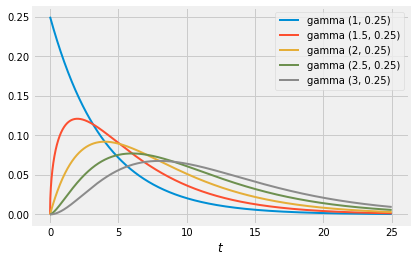

In [6]:
t = np.arange(0, 25, 0.01)
r_1 = stats.gamma.pdf(t, 1, scale=1/0.25)
r_1_5 = stats.gamma.pdf(t, 1.5, scale=1/0.25)
r_2 = stats.gamma.pdf(t, 2, scale=1/0.25)
r_2_5 = stats.gamma.pdf(t, 2.5, scale=1/0.25)
r_3 = stats.gamma.pdf(t, 3, scale=1/0.25)
plt.plot(t, r_1, lw=2, label='gamma (1, 0.25)')
plt.plot(t, r_1_5, lw=2, label='gamma (1.5, 0.25)')
plt.plot(t, r_2, lw=2, label='gamma (2, 0.25)')
plt.plot(t, r_2_5, lw=2, label='gamma (2.5, 0.25)')
plt.plot(t, r_3, lw=2, label='gamma (3, 0.25)')
plt.xlabel('$t$')
plt.legend();

#newpage

### 5. Mean and Variance of the Gamma ###
As in Question 4, let $r$ and $\lambda$ be positive constants.

**a)** Use Question 4(c) and properties of densities to evaluate
$$
\int_0^\infty t^{r-1}e^{-\lambda t} dt
$$
in terms of $r$, $\lambda$, and the Gamma function. For what follows, keep in mind that your formula is correct for all positive $r$.

**b)** Let $T$ have gamma $(r, \lambda)$ density. Use (a) and 4(a) to find a simple formula for $E(T)$ in terms of $r$ and $\lambda$. Please don't leave any integrals in your answer.

**c)** For $T$ as in (b), find $E(T^2)$ and hence $Var(T)$. Again, there should be no integrals left in your answer.

**d)** Identify the gamma $(1, \lambda)$ density as one that has another famous name, and confirm that your answers to (b) and (c) are consistent with what you already know about that density.

#newpage

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using an application. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general HW 9 Piazza thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Homework 9 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**


### **We will not grade assignments which do not have pages selected for each question.** 